In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import seaborn as sns

In [2]:
# Read comments
stu_comments = pd.read_excel('Study3.xlsx',sheet_name=2, header=1).dropna(axis = 0, how ='any')
comments = stu_comments['Text'].dropna()
# tknzr = TweetTokenizer()
# token_words =[]
# for i in comments:
#     token_words.append(tknzr.tokenize(i))

# print(len(token_words))
# print(token_words)
# comments
type(comments)

pandas.core.series.Series

## Text pre-processing

In [3]:
# Remove punctuation
from nltk.tokenize import RegexpTokenizer

def filter_video(comments):
#     tknzr = TweetTokenizer()
#     wordnet_lemmatizer = WordNetLemmatizer()
    
#     token_words =[]
#     for i in comments:
#         token_words.append(tknzr.tokenize(i))
    

    # Combine all the comments
    all_words =[]
    for j in comments:
        for k in j:
            all_words.append(k)
    # print(all_words)

    clean_words = []
    # tokenizer = RegexpTokenizer(r'\w+')
    for word in all_words:
        word = word.lower()
    #     removed_list.append(tokenizer.tokenize(i))
        word = re.sub("[\(\)\=\s+\d+\.\?\''\:\-\!\|\/_,$%^*(+\"]+","",word)
        clean_words.append(word)
    clean_words = list(filter(None, clean_words))

    # Remove stop words  
    filtered_sentence = []
    stop_words = set(stopwords.words('english')) 

    for w in clean_words: 
        if w not in stop_words: 
#             w = wordnet_lemmatizer.lemmatize(w)
            filtered_sentence.append(w) 
    return filtered_sentence

## Split each single video

In [4]:
classes = stu_comments[['Video','Text']].dropna()
tut1 = classes[(classes['Video'] == 'Tutorial1')]['Text']
tut2 = classes[(classes['Video'] == 'Tutorial2')]['Text']
tut3 = classes[(classes['Video'] == 'Tutorial3')]['Text']
tut4 = classes[(classes['Video'] == 'Tutorial4')]['Text']
exp1 = classes[(classes['Video'] == 'Example1')]['Text']
exp2 = classes[(classes['Video'] == 'Example2')]['Text']
exp3 = classes[(classes['Video'] == 'Example3')]['Text']
exp4 = classes[(classes['Video'] == 'Example4')]['Text']

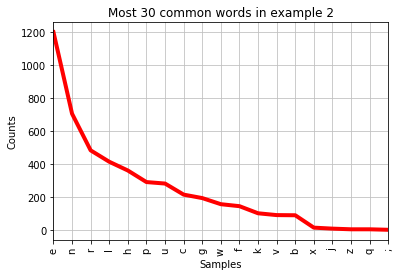

In [5]:
result = filter_video(tut1)

# # Calculate frequency~
frequency_words = FreqDist(result)
frequency_words.plot(30,scalex=False,cumulative=False, color='r',title='Most 30 common words in example 2',linewidth=4)

plt.show()

## Combine all tutorials

In [6]:
from itertools import chain
all_tut = list(chain(tut1,tut2,tut3,tut4))

all_words = filter_video(all_tut)
dict = {}
for key in all_words:
    dict[key] = dict.get(key,0) + 1

sorted_list = sorted(dict.items(), key=lambda x: x[1],reverse=True)[0:30]

single_word=[]
for i in sorted_list:
    single_word.append(i[0])

x = single_word
y = ['Tutorial 1','Tutorial 2', 'Tutorial 3', 'Tutorial 4']

# frequency_words = FreqDist(r)
# frequency_words.plot(30,scalex=False,cumulative=False, color='black',title='Most 30 common words in all tutorial videos',linewidth=4)

In [7]:
result1 = filter_video(tut1)
result2 = filter_video(tut2)
result3 = filter_video(tut3)
result4 = filter_video(tut4)